In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('DataSets/upi.csv')
df.head()

,TransactionID,TransactionDate,Amount,BankNameSent,BankNameReceived,RemainingBalance,City,Gender,TransactionType,Status,TransactionTime,DeviceType,PaymentMethod,MerchantName,Purpose,CustomerAge,PaymentMode,Currency,CustomerAccountNumber,MerchantAccountNumber
0,TXN00001,02-02-2024,271.64,SBI Bank,HDFC Bank,5557.02,Delhi,Female,Transfer,Success,12:14.0,Tablet,Phone Number,Amazon,Food,21,Scheduled,USD,1.234570e+11,9.876540e+11
1,TXN00002,03-03-2024,1064.63,ICICI Bank,SBI Bank,9753.32,Bangalore,Male,Payment,Success,15:02.0,Laptop,QR Code,Zomato,Travel,22,Instant,EUR,1.234570e+11,9.876540e+11
2,TXN00003,04-04-2024,144.15,Axis Bank,Axis Bank,7597.35,Hyderabad,Female,Transfer,Success,29:39.0,Mobile,UPI ID,Swiggy,Bill Payment,23,Scheduled,GBP,1.234570e+11,9.876540e+11
3,TXN00004,05-05-2024,612.89,HDFC Bank,ICICI Bank,2327.84,Mumbai,Male,Payment,Success,27:36.0,Tablet,Phone Number,IRCTC,Others,24,Instant,INR,1.234570e+11,9.876540e+11
4,TXN00005,06-06-2024,743.32,SBI Bank,HDFC Bank,1136.84,Delhi,Female,Transfer,Failed,06:22.0,Laptop,QR Code,Flipkart,Shopping,25,Scheduled,USD,1.234570e+11,9.876540e+11


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   TransactionID          20000 non-null  object 
 1   TransactionDate        20000 non-null  object 
 2   Amount                 20000 non-null  float64
 3   BankNameSent           20000 non-null  object 
 4   BankNameReceived       20000 non-null  object 
 5   RemainingBalance       20000 non-null  float64
 6   City                   20000 non-null  object 
 7   Gender                 20000 non-null  object 
 8   TransactionType        20000 non-null  object 
 9   Status                 20000 non-null  object 
 10  TransactionTime        20000 non-null  object 
 11  DeviceType             20000 non-null  object 
 12  PaymentMethod          20000 non-null  object 
 13  MerchantName           20000 non-null  object 
 14  Purpose                20000 non-null  object 
 15  Cu

In [4]:
df.shape

(20000, 20)

In [5]:
df.dtypes

TransactionID             object
TransactionDate           object
Amount                   float64
BankNameSent              object
BankNameReceived          object
RemainingBalance         float64
City                      object
Gender                    object
TransactionType           object
Status                    object
TransactionTime           object
DeviceType                object
PaymentMethod             object
MerchantName              object
Purpose                   object
CustomerAge                int64
PaymentMode               object
Currency                  object
CustomerAccountNumber    float64
MerchantAccountNumber    float64
dtype: object

## Data Cleaning

In [6]:
df.isna().sum()

TransactionID            0
TransactionDate          0
Amount                   0
BankNameSent             0
BankNameReceived         0
RemainingBalance         0
City                     0
Gender                   0
TransactionType          0
Status                   0
TransactionTime          0
DeviceType               0
PaymentMethod            0
MerchantName             0
Purpose                  0
CustomerAge              0
PaymentMode              0
Currency                 0
CustomerAccountNumber    0
MerchantAccountNumber    0
dtype: int64

In [7]:
df['CustomerAccountNumber'] = df['CustomerAccountNumber'].astype(str)
df['MerchantAccountNumber'] = df['MerchantAccountNumber'].astype(str)

df['Gender'] = df['Gender'].astype('category')
df['Status'] = df['Status'].astype('category')
df['PaymentMode'] = df['PaymentMode'].astype('category')

df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], format='%d-%m-%Y')

In [8]:
df.dtypes

TransactionID                    object
TransactionDate          datetime64[ns]
Amount                          float64
BankNameSent                     object
BankNameReceived                 object
RemainingBalance                float64
City                             object
Gender                         category
TransactionType                  object
Status                         category
TransactionTime                  object
DeviceType                       object
PaymentMethod                    object
MerchantName                     object
Purpose                          object
CustomerAge                       int64
PaymentMode                    category
Currency                         object
CustomerAccountNumber            object
MerchantAccountNumber            object
dtype: object

In [9]:
df.head()

,TransactionID,TransactionDate,Amount,BankNameSent,BankNameReceived,RemainingBalance,City,Gender,TransactionType,Status,TransactionTime,DeviceType,PaymentMethod,MerchantName,Purpose,CustomerAge,PaymentMode,Currency,CustomerAccountNumber,MerchantAccountNumber
0,TXN00001,2024-02-02,271.64,SBI Bank,HDFC Bank,5557.02,Delhi,Female,Transfer,Success,12:14.0,Tablet,Phone Number,Amazon,Food,21,Scheduled,USD,123457000000.0,987654000000.0
1,TXN00002,2024-03-03,1064.63,ICICI Bank,SBI Bank,9753.32,Bangalore,Male,Payment,Success,15:02.0,Laptop,QR Code,Zomato,Travel,22,Instant,EUR,123457000000.0,987654000000.0
2,TXN00003,2024-04-04,144.15,Axis Bank,Axis Bank,7597.35,Hyderabad,Female,Transfer,Success,29:39.0,Mobile,UPI ID,Swiggy,Bill Payment,23,Scheduled,GBP,123457000000.0,987654000000.0
3,TXN00004,2024-05-05,612.89,HDFC Bank,ICICI Bank,2327.84,Mumbai,Male,Payment,Success,27:36.0,Tablet,Phone Number,IRCTC,Others,24,Instant,INR,123457000000.0,987654000000.0
4,TXN00005,2024-06-06,743.32,SBI Bank,HDFC Bank,1136.84,Delhi,Female,Transfer,Failed,06:22.0,Laptop,QR Code,Flipkart,Shopping,25,Scheduled,USD,123457000000.0,987654000000.0


## Data Aggregation and Grouping 

In [10]:
group1 = df.groupby(['Gender', 'Status'])['TransactionID'].count()
group1

C:\Users\gpiska\AppData\Local\Temp\ipykernel_1236\1458217719.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group1 = df.groupby(['Gender', 'Status'])['TransactionID'].count()


Gender  Status 
Female  Failed     2000
        Success    8000
Male    Failed     2000
        Success    8000
Name: TransactionID, dtype: int64

In [11]:
df['BankNameSent'].nunique()

4

In [12]:
df['BankNameReceived'].nunique()

4

In [13]:
group2 = df.groupby(['BankNameSent', 'Gender'])['Amount'].sum()
group2

C:\Users\gpiska\AppData\Local\Temp\ipykernel_1236\784988853.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group2 = df.groupby(['BankNameSent', 'Gender'])['Amount'].sum()


BankNameSent  Gender
Axis Bank     Female    4907634.17
              Male            0.00
HDFC Bank     Female          0.00
              Male      5052564.92
ICICI Bank    Female          0.00
              Male      4875336.23
SBI Bank      Female    5036738.71
              Male            0.00
Name: Amount, dtype: float64

In [14]:
g3 = df.groupby(['City', 'Gender', 'Status'])['Amount'].sum()
g3

C:\Users\gpiska\AppData\Local\Temp\ipykernel_1236\3374649976.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  g3 = df.groupby(['City', 'Gender', 'Status'])['Amount'].sum()


City       Gender  Status 
Bangalore  Female  Failed           0.00
                   Success          0.00
           Male    Failed      995401.47
                   Success    3879934.76
Delhi      Female  Failed     1017593.65
                   Success    4019145.06
           Male    Failed           0.00
                   Success          0.00
Hyderabad  Female  Failed      972488.59
                   Success    3935145.58
           Male    Failed           0.00
                   Success          0.00
Mumbai     Female  Failed           0.00
                   Success          0.00
           Male    Failed     1011303.37
                   Success    4041261.55
Name: Amount, dtype: float64

In [15]:
pivot = df.pivot_table(values='Amount', index='City', columns='Gender', aggfunc='sum', fill_value=0)
pivot

C:\Users\gpiska\AppData\Local\Temp\ipykernel_1236\1091562611.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = df.pivot_table(values='Amount', index='City', columns='Gender', aggfunc='sum', fill_value=0)


Gender,Female,Male
City,,
Bangalore,0.00,4875336.23
Delhi,5036738.71,0.00
Hyderabad,4907634.17,0.00
Mumbai,0.00,5052564.92


In [16]:
pd.crosstab(df['BankNameSent'], df['Status'])

Status,Failed,Success
BankNameSent,,
Axis Bank,1000,4000
HDFC Bank,1000,4000
ICICI Bank,1000,4000
SBI Bank,1000,4000


In [17]:
df['Age Group'] = np.where(df['CustomerAge'] <= 30, 'A1', 
                  np.where((df['CustomerAge'] > 30) & (df['CustomerAge'] <= 40), 'A2', 'A3'))

In [18]:
df.head()

,TransactionID,TransactionDate,Amount,BankNameSent,BankNameReceived,RemainingBalance,City,Gender,TransactionType,Status,...,DeviceType,PaymentMethod,MerchantName,Purpose,CustomerAge,PaymentMode,Currency,CustomerAccountNumber,MerchantAccountNumber,Age Group
0,TXN00001,2024-02-02,271.64,SBI Bank,HDFC Bank,5557.02,Delhi,Female,Transfer,Success,...,Tablet,Phone Number,Amazon,Food,21,Scheduled,USD,123457000000.0,987654000000.0,A1
1,TXN00002,2024-03-03,1064.63,ICICI Bank,SBI Bank,9753.32,Bangalore,Male,Payment,Success,...,Laptop,QR Code,Zomato,Travel,22,Instant,EUR,123457000000.0,987654000000.0,A1
2,TXN00003,2024-04-04,144.15,Axis Bank,Axis Bank,7597.35,Hyderabad,Female,Transfer,Success,...,Mobile,UPI ID,Swiggy,Bill Payment,23,Scheduled,GBP,123457000000.0,987654000000.0,A1
3,TXN00004,2024-05-05,612.89,HDFC Bank,ICICI Bank,2327.84,Mumbai,Male,Payment,Success,...,Tablet,Phone Number,IRCTC,Others,24,Instant,INR,123457000000.0,987654000000.0,A1
4,TXN00005,2024-06-06,743.32,SBI Bank,HDFC Bank,1136.84,Delhi,Female,Transfer,Failed,...,Laptop,QR Code,Flipkart,Shopping,25,Scheduled,USD,123457000000.0,987654000000.0,A1


# Data Visualization

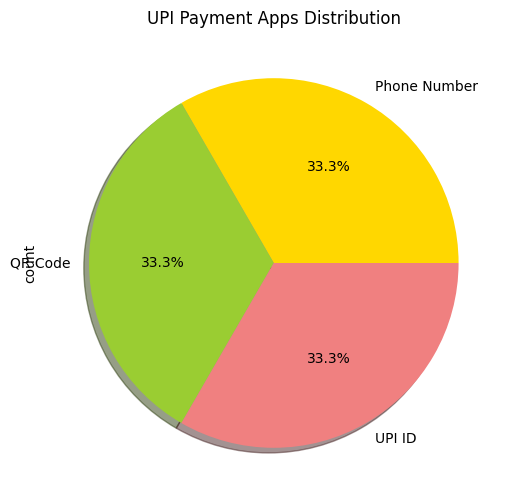

In [19]:
#Payment Methods Distribution (Pie Chart)
df['PaymentMethod'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(6,6), shadow=True, colors=['gold','yellowgreen','lightcoral','lightskyblue'])
plt.title('UPI Payment Apps Distribution')
plt.show()

In [20]:
g1 = df.groupby('MerchantName')['Amount'].mean()

In [21]:
g1

MerchantName
Amazon      986.284627
Flipkart    999.196770
IRCTC       996.584687
Swiggy      986.463432
Zomato      999.538990
Name: Amount, dtype: float64

<Axes: xlabel='MerchantName'>

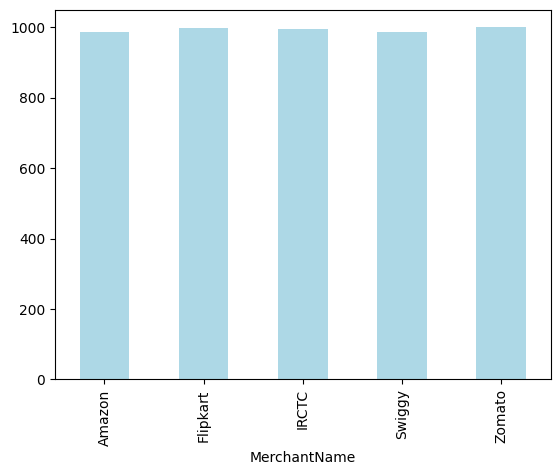

In [22]:
##Identify most-used merchants or spending categories.
g1.plot(kind="bar", color="lightblue")

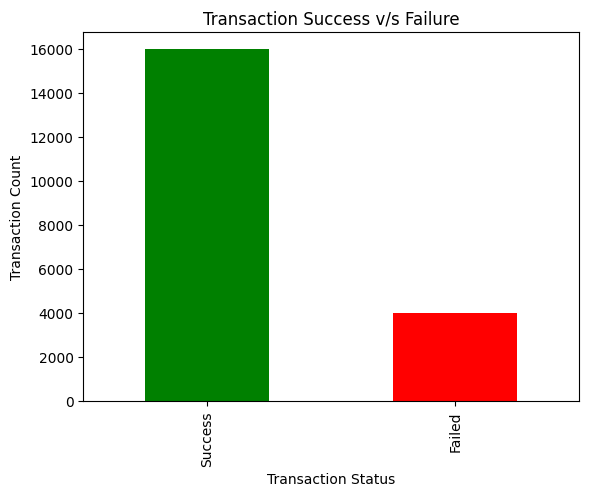

In [23]:
df['Status'].value_counts().plot(kind="bar", color=["green","red"])
plt.title("Transaction Success v/s Failure")
plt.xlabel('Transaction Status')
plt.ylabel('Transaction Count')
plt.show()

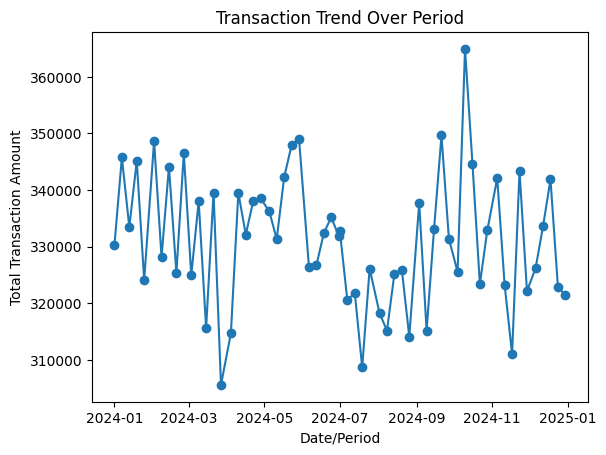

In [24]:
daily_trend = df.groupby('TransactionDate')['Amount'].sum()

plt.plot(daily_trend, marker='o', linestyle='-')
plt.title('Transaction Trend Over Period')
plt.xlabel('Date/Period')
plt.ylabel('Total Transaction Amount')
plt.show()

<Axes: xlabel='Age Group', ylabel='Amount'>

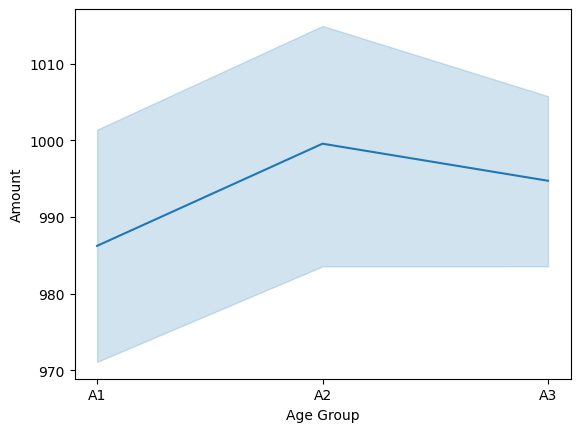

In [25]:
sns.lineplot(x='Age Group',y='Amount',data=df)

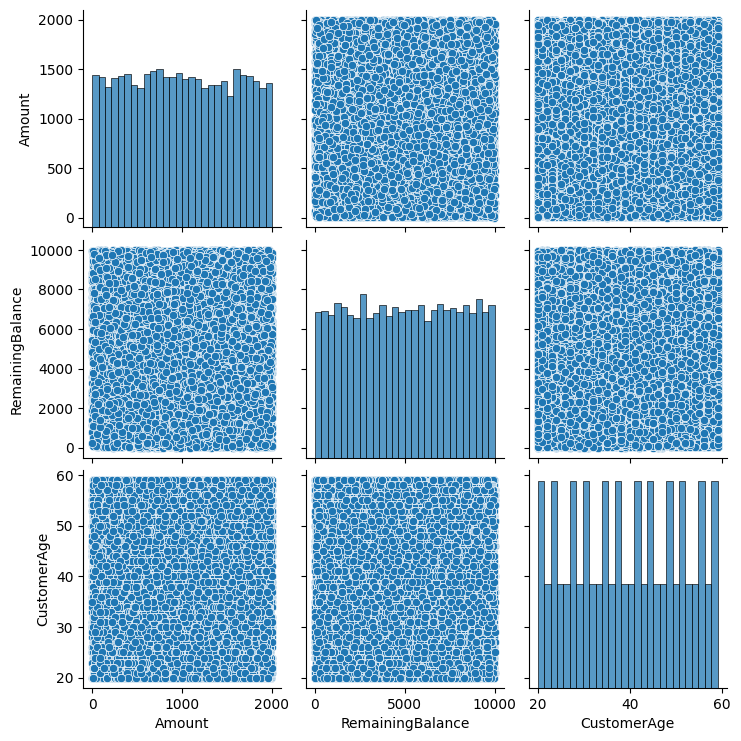

In [26]:
sns.pairplot(df)

C:\Users\gpiska\AppData\Local\Temp\ipykernel_1236\2878413772.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_df = df.pivot_table(index=['PaymentMethod'], columns=['Status'], values='Amount', aggfunc='sum')


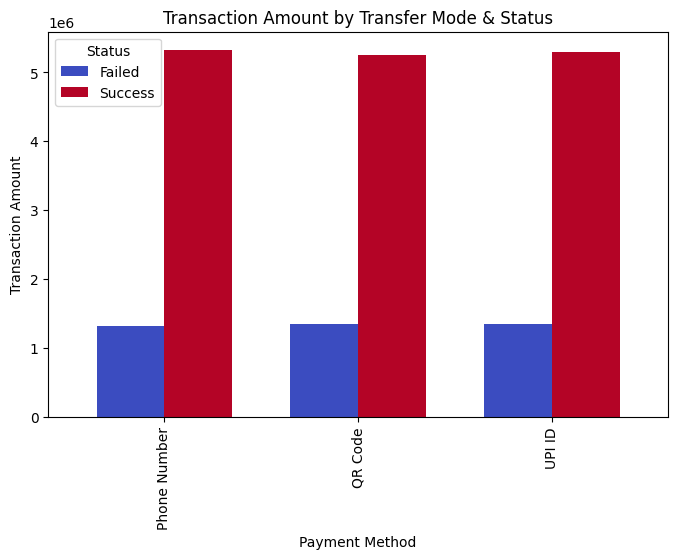

In [28]:
# Pivot data for clustered bar chart
pivot_df = df.pivot_table(index=['PaymentMethod'], columns=['Status'], values='Amount', aggfunc='sum')

# Plot
pivot_df.plot(kind='bar', figsize=(8, 5), colormap='coolwarm', width=0.7)
plt.xlabel('Payment Method')
plt.ylabel('Transaction Amount')
plt.title('Transaction Amount by Transfer Mode & Status')
plt.legend(title='Status')
plt.show()